In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# 그래프 한글 처리하는 코드
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

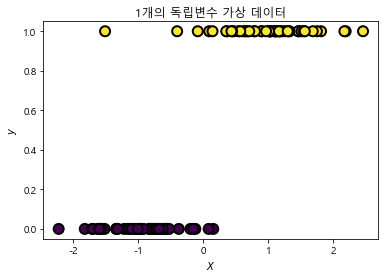

In [2]:
# 가상 데이터 셋 생성 예제
from sklearn.datasets import make_classification

plt.title('1개의 독립변수 가상 데이터')
X,y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.scatter(X,y,marker='o',c=y,s=100,edgecolors='k', linewidths=2)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


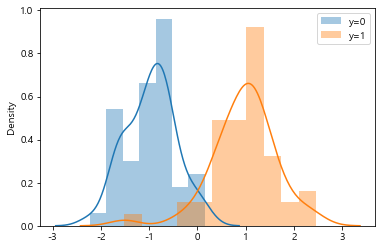

In [6]:
sns.distplot(X[y==0],label='y=0')
sns.distplot(X[y==1],label='y=1')
plt.legend()
plt.show()

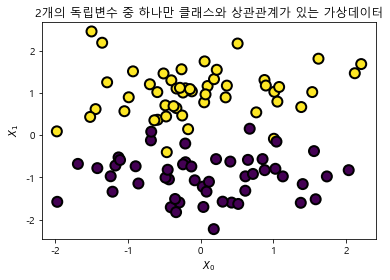

In [15]:
# 가상 데이터 셋 생성 예제
from sklearn.datasets import make_classification

# features = 독립변수 개수 
plt.title('2개의 독립변수 중 하나만 클래스와 상관관계가 있는 가상데이터')
X,y = make_classification(n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100,edgecolors='k', linewidths=2)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

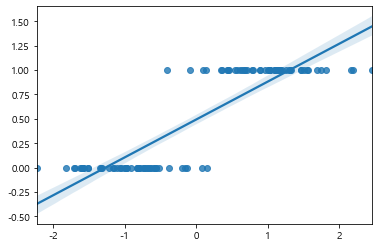

In [12]:
sns.regplot(X[:,1],y)

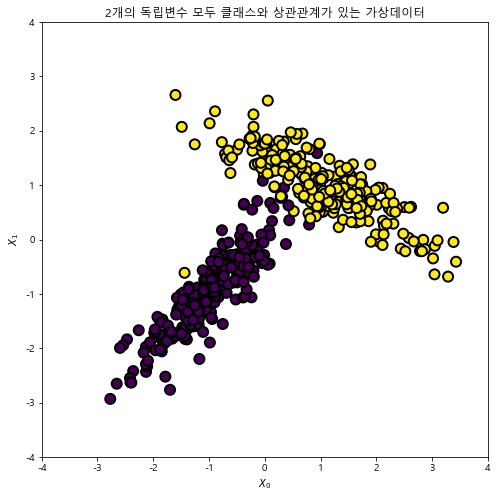

In [19]:
# 가상 데이터 셋 생성 예제
from sklearn.datasets import make_classification
plt.figure(figsize=(8,8))
# features = 독립변수 개수, informative = 상관관계
plt.title('2개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터')
X,y = make_classification(n_features=2, n_informative=2,n_samples=500, n_redundant=0, n_clusters_per_class=1, random_state=6)

plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100,edgecolors='k', linewidths=2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

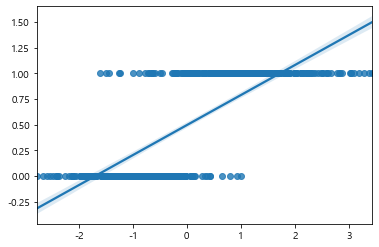

In [22]:
sns.regplot(X[:,0],y)

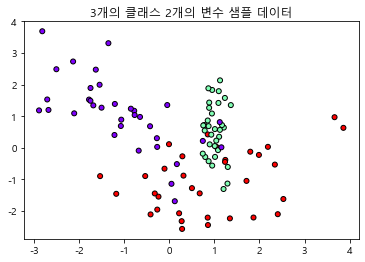

In [32]:
plt.title('3개의 클래스 2개의 변수 샘플 데이터')
X_features, y_labels = make_classification(n_features=2, n_informative=2, n_classes=3, 
                                           n_redundant=0, n_clusters_per_class=1, random_state=0)
# plot 형태로 확인
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [45]:
# 사용자 정의 함수 생성 - classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y) :
    fig,ax = plt.subplots()
    # 학습데이터 scatter plot으로 나타내기
    ax.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
    ax.axis('tight') # 축여백은 없애고
    ax.axis('off') # 축 없애라
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이터로 model학습
    model.fit(X,y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    #영역을 만들어 색을 칠해주는 함수
    ax.contourf(xx,yy,Z,alpha=0.3, levels=np.arange(n_classes+1)-0.5, cmap='rainbow', clim=(y.min(),y.max()), zorder=1) 

<ipython-input-45-fa52eda98045>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  ax.contourf(xx,yy,Z,alpha=0.3, levels=np.arange(n_classes+1)-0.5, cmap='rainbow', clim=(y.min(),y.max()), zorder=1)


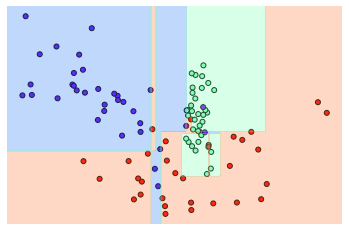

In [46]:
from sklearn.tree import DecisionTreeClassifier
# 특정한 트리 생성에 제약이 없는(전체 default 값) Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# feature_name_df.head(3)

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)

In [ ]:
# 중복 피처명 확인중복 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

In [ ]:
# cumcount() 몇번째 중복인지 확인

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('../Data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용 #\s+ 공백이 하나 이상인 것
    X_train = pd.read_csv('../Data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('../Data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('../Data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('../Data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
#y_train의 class 분포 확인
print(y_train['action'].value_counts()) # 비교적 고르게 분포되어 있음

In [ ]:
X_train.isna().sum().sum()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df_clf = DecisionTreeClassifier(random_state = 156)
df_clf.fit(X_train,y_train)
pred = df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정트리 예측 정확도 : {0:.4}'.format(accuracy))

In [ ]:
# 현재 모델의 하이퍼파라미터의 설정 확인
df_clf.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20]
}

# cv=5로 설정 # verbose=1
grid_cv = GridSearchCV(df_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)


In [ ]:
print('GridSearchCV 최고 평균 정확도 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 파라미터 :', grid_cv.best_params_)

In [ ]:
## depth 단계마다 평균 정확도 확인
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

In [ ]:
params = {
    'max_depth' : [6,8,10,12,16,20]
}

for depth in max_depth :
    df_clf=DecisionTreeClassifier(max_depth=depth,random_state=156)
    df_clf.fit(X_train,y_train)
    pred = df_clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도:{1:.4f}'.format(depth,accuracy))

In [ ]:
params = {
    'max_depth' : [8, 10, 12],
    'min_samples_split' : [16, 24]
}

# cv=5로 설정 # verbose=1
grid_cv = GridSearchCV(df_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 파라미터 :', grid_cv.best_params_)

In [ ]:
best_df_clf = grid_cv.best_estimator_ # 최적파라미터 모델
pred_fin = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred_fin)
print('예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()